1. 模型结构
逻辑回归
是一种线性模型，属于广义线性回归的特例。
对于多分类任务（如识别 0-9），通常采用 “一对多”（One-vs-Rest）策略，即训练 10 个二分类器（每个数字对应一个）。
模型结构：输入特征 → 线性组合 → Sigmoid 函数（输出概率）。
没有隐藏层，只能学习输入特征与输出之间的线性关系。
神经网络
是非线性模型，由多层神经元组成。
对于多分类任务，可直接通过输出层的多个神经元（如 10 个）输出各类别的概率。
模型结构：输入层 → 隐藏层（可多层） → 输出层，层与层之间通过非线性激活函数（如 Sigmoid、ReLU）连接。
隐藏层能自动学习高阶特征（如边缘、纹理、形状），无需人工设计特征。
神经网络
通过多层非线性变换，理论上可以逼近任意复杂的函数（ universal approximation theorem）。
例如，隐藏层可自动学习 “笔画方向”“拐角” 等抽象特征，无需人工干预。
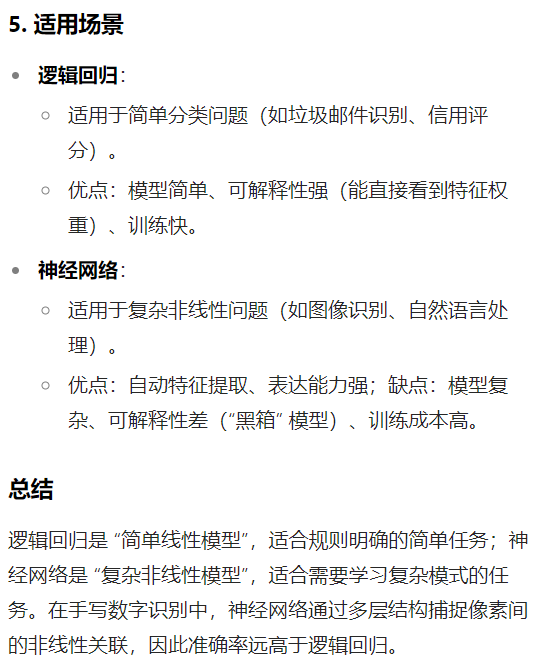
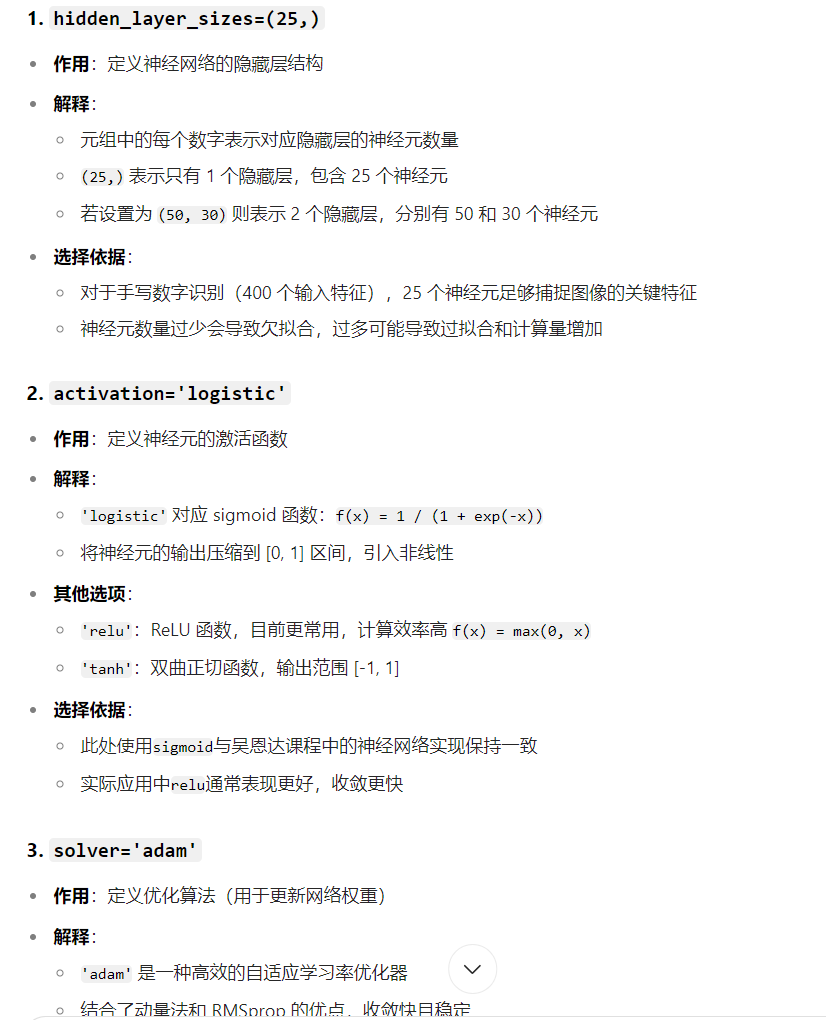


开始训练神经网络...

训练集准确率 1.0
测试集准确率 0.93

单个图像预测:
预测结果: 1 实际标签: 1

100个图像预测:


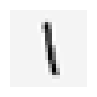

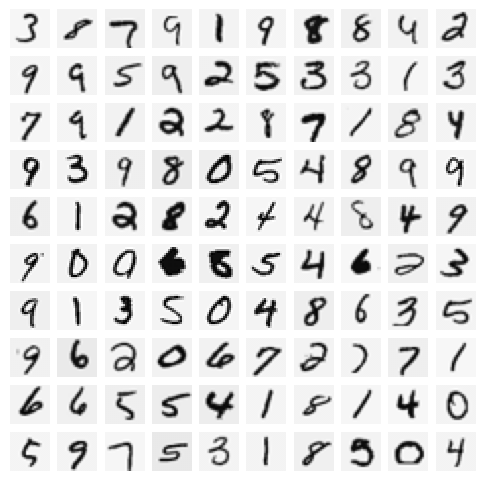

100个样本的预测准确率: 0.97


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # 导入多层感知器分类器
from sklearn.linear_model import LogisticRegression

# 加载数据
data = sio.loadmat(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex3-neural network\ex3data1.mat")
x = data['X']  # 特征数据 (5000, 400)
y = data['y'].ravel()  # 转换为一维数组
y[y == 10] = 0  # 调整标签，将10改为0

# 随机展示单个图像
def dytp(x):
    pickone = np.random.randint(5000)
    image = x[pickone, :]
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.imshow(image.reshape(20, 20).T, cmap='gray_r')
    plt.axis('off')
    return pickone

# 随机展示100个图像
def dytp100(x):
    pick100 = np.random.choice(5000, 100)
    images = x[pick100, :]
    fig, ax = plt.subplots(10, 10, figsize=(6, 6), sharex=True, sharey=True)
    for r in range(10):
        for c in range(10):
            ax[r, c].imshow(images[10*r + c].reshape(20, 20).T, cmap='gray_r')
            ax[r, c].axis('off')
    plt.show()
    return pick100

# 特征标准化
def pf(x):
    return (x - x.mean()) / x.std()
x = pf(x)

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# 使用scikit-learn的MLPClassifier构建神经网络
# hidden_layer_sizes指定隐藏层结构，这里是一个有25个神经元的隐藏层
mlp=MLPClassifier(
    random_state=42,
    solver='adam',
    activation='relu',
    max_iter=1000,
    hidden_layer_sizes=(25,)
    verbose=True#打印训练信息
)
# 训练模型
print("开始训练神经网络...")
mlp.fit(x_train, y_train)

# 模型评估
y_trp = mlp.predict(x_train)
y_tep = mlp.predict(x_test)
print('\n训练集准确率', np.mean(y_trp == y_train))
print('测试集准确率', np.mean(y_tep == y_test))

# 单个图像预测
print("\n单个图像预测:")
idx = dytp(x)
impf = pf(x[idx:idx+1, :])
prediction = mlp.predict(impf)
print("预测结果:", prediction[0], "实际标签:", y[idx])

# 100个图像预测
print("\n100个图像预测:")
indices = dytp100(x)
impf = pf(x[indices, :])
predictions = mlp.predict(impf)
acc = y[indices]
print("100个样本的预测准确率:", np.mean(acc == predictions))
    